In [1]:
from system import TradingEnv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper')

/home/aaruran/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
%matplotlib inline

In [3]:
amzn_env = TradingEnv('AMZN')

In [16]:
amzn_env.data

,x,diff_x,std,sharpe,q,prices
Date,,,,,,
2013-11-08,-4.141182,-0.011551,NaN,0.000000,0.000000,350.309998
2013-11-11,-4.129630,0.013780,NaN,0.000000,0.002021,354.380005
2013-11-12,-4.143411,-0.018959,NaN,0.000000,0.000969,349.529999
2013-11-13,-4.124451,-0.030903,NaN,0.000000,-0.000818,356.220001
2013-11-14,-4.093549,-0.004806,NaN,0.000000,-0.000128,367.399994
...,...,...,...,...,...,...
2017-12-28,-2.921574,0.014120,0.007688,-0.066098,0.001410,1186.099976
2017-12-29,-2.935694,-0.016570,0.007117,-0.150984,-0.000084,1169.469971
2018-01-02,-2.919124,-0.012694,0.007450,-0.277704,-0.000944,1189.010010


In [17]:
df= amzn_env.data
df['prices'] = amzn_env.prices
df.head()

,x,diff_x,std,sharpe,q,prices
Date,,,,,,
2013-11-08,-4.141182,-0.011551,NaN,0.0,0.000000,350.309998
2013-11-11,-4.129630,0.013780,NaN,0.0,0.002021,354.380005
2013-11-12,-4.143411,-0.018959,NaN,0.0,0.000969,349.529999
2013-11-13,-4.124451,-0.030903,NaN,0.0,-0.000818,356.220001
2013-11-14,-4.093549,-0.004806,NaN,0.0,-0.000128,367.399994


x            AxesSubplot(0.125,0.125;0.110714x0.755)
diff_x    AxesSubplot(0.257857,0.125;0.110714x0.755)
std       AxesSubplot(0.390714,0.125;0.110714x0.755)
sharpe    AxesSubplot(0.523571,0.125;0.110714x0.755)
q         AxesSubplot(0.656429,0.125;0.110714x0.755)
prices    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

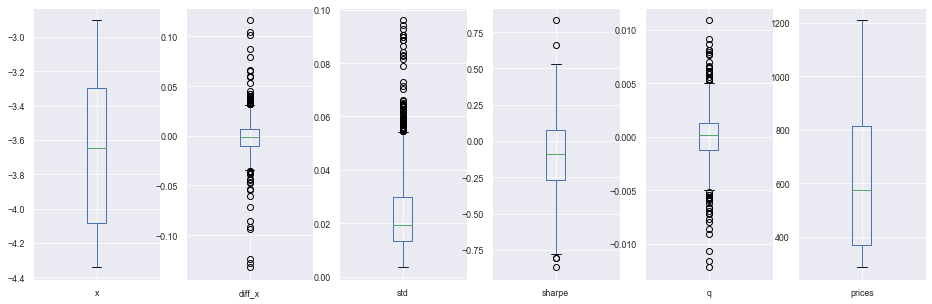

In [18]:
df.plot(kind='box', subplots=True, figsize=(16, 5))

[]

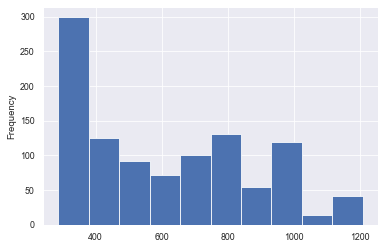

In [19]:
df['prices'].plot(kind='hist')
plt.plot()

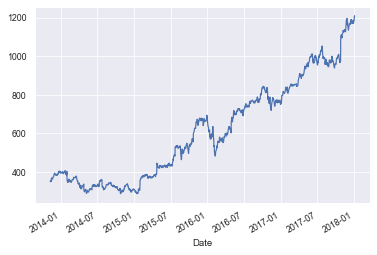

In [8]:
df['prices'].plot()
plt.show()

In [36]:
prices = df['prices']
min_prices = prices.expanding().min().shift(-1)
max_prices = prices.expanding().max().shift(-1)
width = max_prices - min_prices
width[0] = 1
center = prices.expanding().median().shift(-1)
# scaled_prices = (prices - center) / width
# scaled_prices.plot()

In [46]:
prices.expanding().std().shift(-1).fillna(np.Inf)

Date
2013-11-08      2.877930
2013-11-11      2.604353
2013-11-12      3.211513
2013-11-13      7.175245
2013-11-14      8.486643
                 ...    
2017-12-28    255.709519
2017-12-29    256.212072
2018-01-02    256.744612
2018-01-03    257.285699
2018-01-04           inf
Name: prices, Length: 1046, dtype: float64

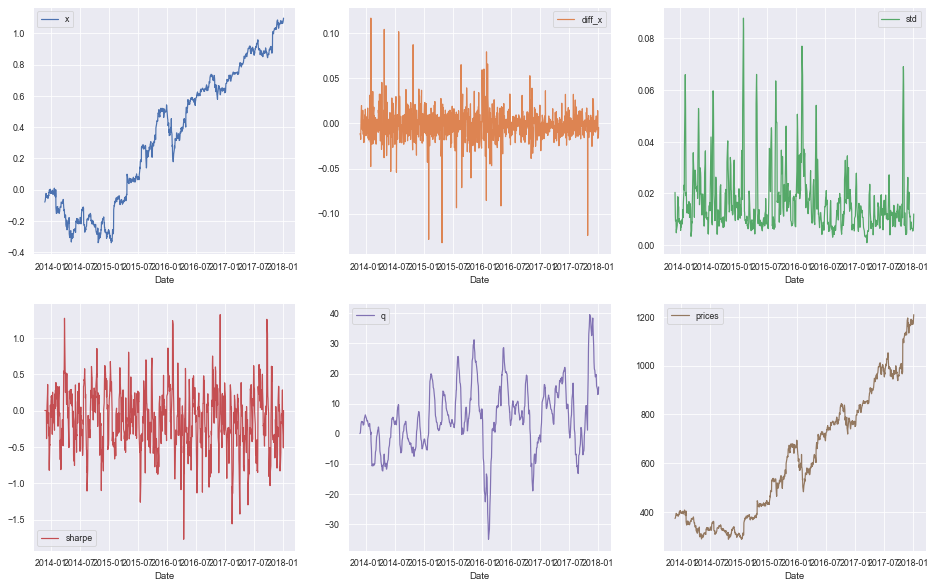

In [31]:
df.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()

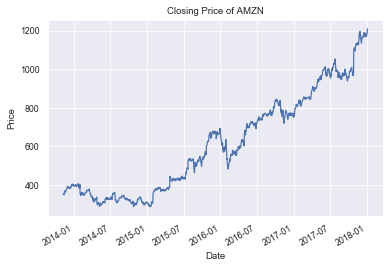

In [9]:
amzn_env.prices.plot()
plt.ylabel('Price')
plt.title('Closing Price of AMZN')
plt.savefig('plots/nonstationary-prices-amazon.png')
plt.show()

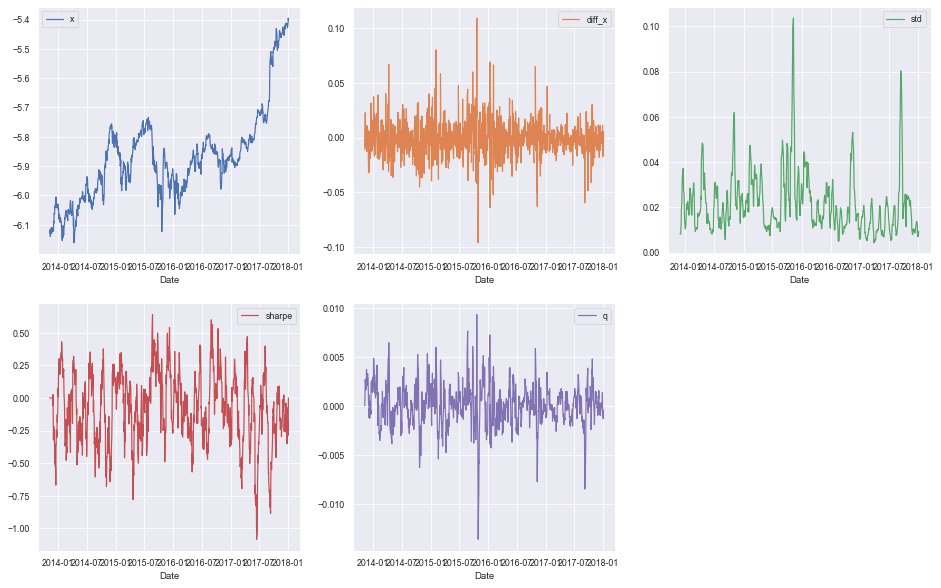

In [10]:
abbv_env = TradingEnv('ABBV')
abbv_env.data.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()

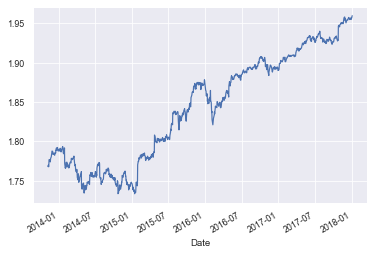

In [15]:
df['prices'].apply(np.log).apply(np.log).plot()